# 1 Cilj vježbe

Cilj vježbe je upoznavanje sa naprednijim konceptima tekstualne klasifikacije. Kroz vježbu, studenti se upoznaju
sa pojmovima tokenizacije i vektorizacije. U zadacima studenti koriste naučene koncepte kako bi rješavali problem
klasifikacije tekstualnih podataka, pri čemu podaci nisu tabelarno struktuirani.

##Zadatak 1

U ovom zadatku nastavljamo sa binarnom klasifikacijom, no ovdje ćemo se upoznati sa radom na skupu podataka koji
zahtijeva procesiranje prirodnog jezika (eng. Natural Language Processing - NLP). Ovo podrazumijeva korištenje iznad objašnjene tehnike tokenizacije i vektorizacije podataka. Problem nad kojim će se ovo primjenjivati je klasificiranje poruka kao spam ili ham. Spam predstavljaju neželjene poruke koje su u nekim slučajevima i generisane, te se šalju velikom broju korisnika bilo radi reklame, pokušaja prevare, namjernog opterećivanja inboxa korisnika
i tako dalje. Sa druge strane, ham poruke su korisne poruke koje korisnik zaista treba i želi da primi. Mail servisi koriste upravo spam klasifikatore kako bi zaštitili svoje korisnike
od prevara, virusa ili bilo kakvog neželjenog maila. Skup podataka koji ćemo koristiti se sastoji od 2100 poruka koje
imaju pridruženu labelu Spam ili Ham.


a) Učitati skup podataka iz priloga vježbe ’SpamDetectionData.txt’ te prikazati prva 3 podatka kako bi se upoznali
sa formatom skupa podataka. Koje su kolone u ovom skupu podataka?

In [ ]:
import pandas as pd
data = pd.read_csv("SpamDetectionData.txt")
data.head(3)


,Label,Message
0,Spam,<p>But could then once pomp to nor that glee g...
1,Spam,<p>His honeyed and land vile are so and native...
2,Spam,<p>Tear womans his was by had tis her eremites...


b) Iz skupa podataka izdvojiti X i y pri čemu je X skup poruka, a y pridružene labele. Zatim ukloniti iz poruka
html tagove < p > i < /p > s obzirom da se oni nalaze u svakoj poruci. Koliko slova ima prva, a koliko druga
rečenica iz skupa podataka?

In [ ]:
import re as re #za koristenje regexa

def ukloni_tagove(string):
  rez=re.sub("<.*?>","", string)
  #rez=re.sub("<\p>","",string)
  return rez

y=data.pop('Label') #izdvajanje kolone sa labelama
data['Message']=data['Message'].apply(lambda poruka: ukloni_tagove(poruka))
X=data
print("Poruke: ",X)
print("Labele: ",y)

Poruke:                                                  Message
0     But could then once pomp to nor that glee glor...
1     His honeyed and land vile are so and native fr...
2     Tear womans his was by had tis her eremites th...
3     The that and land. Cell shun blazon passion un...
4     Sing aught through partings things was sacred ...
...                                                 ...
2095  Distant pondered me sought so there perched me...
2096  Relief flee not and. Oh will shamed mine by wh...
2097  Gloated just the shrieked lost morrow in my bo...
2098  Aye girls had plain the deem to a. At monastic...
2099  Above nevermore nothing no and chamber soul su...

[2100 rows x 1 columns]
Labele:  0       Spam
1       Spam
2       Spam
3       Spam
4       Spam
        ... 
2095     Ham
2096    Spam
2097     Ham
2098    Spam
2099     Ham
Name: Label, Length: 2100, dtype: object


c) Podijeliti skup podataka na dio za treniranje i testiranje pri čemu 10% ukupnog skupa se treba uzeti kao testni
set;

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.10, random_state=42)

d) Izvršiti tokenizaciju teksta korištenjem Tokenizer objekta kao što je opisano u vježbi. Vokabular generisati
na osnovu trening podataka. Nakon toga, na osnovu generisanog rječnika pretvoriti sve poruke (i iz trening i
test skupa) iz teksta u niz cijelih brojeva. Koje su tri najčešće riječi u tekstu? Kako izgleda prva rečenica iz
trening skupa podataka, a kako izgleda formirani niz cijelih brojeva za nju?

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['Message'])
train_data_seq = tokenizer.texts_to_sequences(X_train['Message'])
test_data_seq = tokenizer.texts_to_sequences(X_test['Message'])
print(tokenizer.word_index) # Ispisuje generisani rjecnik
print(tokenizer.word_counts) #Ispisuje broj ponavljanja svake od rijeci u tekstu
print(X_train.iloc[0,0])
print(train_data_seq[0])


{'the': 1, 'and': 2, 'of': 3, 'i': 4, 'a': 5, 'to': 6, 'my': 7, 'that': 8, 'he': 9, 'his': 10, 'in': 11, 'this': 12, 'but': 13, 'from': 14, 'was': 15, 'door': 16, 'or': 17, 'chamber': 18, 'on': 19, 'at': 20, 'is': 21, 'nor': 22, 'by': 23, 'for': 24, 'had': 25, 'not': 26, 'bird': 27, 'raven': 28, 'with': 29, 'nevermore': 30, 'thy': 31, 'then': 32, 'it': 33, 'there': 34, 'me': 35, 'more': 36, 'lenore': 37, 'still': 38, 'so': 39, 'one': 40, 'said': 41, 'soul': 42, 'no': 43, 'name': 44, 'childe': 45, 'if': 46, 'into': 47, 'above': 48, 'before': 49, 'nothing': 50, 'what': 51, 'bust': 52, 'all': 53, 'as': 54, 'him': 55, 'be': 56, 'some': 57, 'yet': 58, 'upon': 59, 'did': 60, 'tis': 61, 'though': 62, 'only': 63, 'heart': 64, 'tapping': 65, 'word': 66, 'whom': 67, 'quoth': 68, 'sad': 69, 'than': 70, 'whose': 71, 'where': 72, 'would': 73, 'floor': 74, 'now': 75, 'harold': 76, 'her': 77, 'ah': 78, 'none': 79, 'angels': 80, 'ever': 81, 'oer': 82, 'have': 83, 'long': 84, 'thee': 85, 'its': 86, 'le

e) Kao što smo se mogli uvjeriti u zadatku b), nemaju sve rečenice istu dužinu. To se može riješiti vektorizacijom.
Definisati funkcije vectorize_sequences(sequences, dimension) i vectorize_labels(labels).
Prva funkcija treba da vrši vektorizaciju ulaznih podataka i prima kao prvi parametar nizove cijelih brojeva
koji su rezultat prethodnog podzadatka. Kao drugi parametar treba da prima broj na koju dužinu treba
vektorizovati te nizove. Druga funkcija, vectorize_labels, treba da vrši vektorizaciju labela pri čemu labeli
’spam’ dodijeliti vrijednost 1, a klasi ’ham’ vrijednost 0. Pozvati ove funkcije nad vrijednostima dobijenim pod
c) pri čemu vektorizaciju ulaznih podataka vršiti na vektore od 4000 elemenata;

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=4000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

def vectorize_labels(labels):
  results = np.zeros(len(labels))
  for i, label in enumerate(labels):
    if (label.lower() == 'spam'):
      results[i]=1
  return results

#sequences je lista
x_train=vectorize_sequences(train_data_seq)
x_test=vectorize_sequences(test_data_seq)
y_train=vectorize_labels(Y_train)
y_test=vectorize_labels(Y_test)
print(x_train)
print(y_train)


[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[0. 1. 1. ... 0. 0. 1.]


f) Definisati sekvencijalni Keras model koji prima ulaz oblika (4000,). Prva dva skrivena sloja trebaju biti
Dense i imati 8 neurona sa aktivacijskom funkcijom relu. Izlazni sloj treba imati jedan neuron i imati
sigmoid aktivacijsku funkciju;

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(4000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


g) Kompajlirati model tako da koristi rmsprop optimizator, za funkciju gubitka koristiti binary_crossentropy,
te accuracy kao metriku;

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

h) Istrenirati model na 5 epoha sa veličinom batcha od 128. 30% skupa za treniranje koristiti za validaciju. Kolika
je postignuta tačnost i vrijednost funkcije gubitka? Grafički prikazati;

Epoch 1/5
11/11 [==============================] - 3s 52ms/step - loss: 0.3435 - accuracy: 0.9516 - val_loss: 0.1169 - val_accuracy: 1.0000
Epoch 2/5
11/11 [==============================] - 0s 11ms/step - loss: 0.0928 - accuracy: 1.0000 - val_loss: 0.0503 - val_accuracy: 1.0000
Epoch 3/5
11/11 [==============================] - 0s 10ms/step - loss: 0.0451 - accuracy: 1.0000 - val_loss: 0.0260 - val_accuracy: 1.0000
Epoch 4/5
11/11 [==============================] - 0s 9ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 5/5
11/11 [==============================] - 0s 9ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000


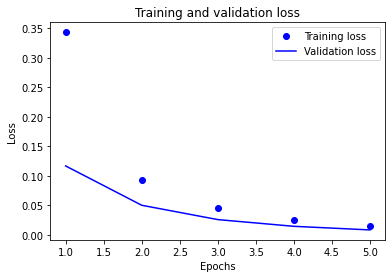

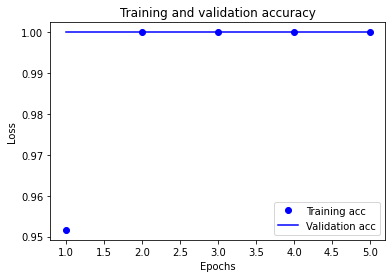

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math 

history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
acc = history.history['accuracy']
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

i) Izvršiti evaluaciju modela nad testnim skupom podataka. Kolika je tačnost nad ovim skupom?

In [ ]:
results = model.evaluate(x_test, y_test)


7/7 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 1.0000


j) Definišite proizvoljnu poruku, pomoću tokenizera formirajte niz cijelih brojeva, vektorizujte ga i provjerite da
li model ispravno klasificira tu poruku.

In [ ]:
string=["Danas nam je divan dan, divan dan, divan dan."]
test_seq = tokenizer.texts_to_sequences(string)
vectorize_test_seq=vectorize_sequences(test_seq)
model.predict(vectorize_test_seq)
ynew=model.predict(vectorize_test_seq)
for i in range(len(vectorize_test_seq)):
  print("X=%s, Predicted=%s" % (vectorize_test_seq[i], ynew[i]))


X=[0. 0. 0. ... 0. 0. 0.], Predicted=[0.5184463]


## Zadatak 2 - Višeklasna klasifikacija - klasificiranje Stackoverflow pitanja

a) Učitati ’stackoverflow.csv’ skup podataka iz priloga vježbe i prikazati posljednja tri podatka;


In [ ]:
stackoverflow=pd.read_csv("stackoverflow.csv")
stackoverflow.tail(3)


,post,tags
1987,directory folder name to put user defined pack...,java
1988,send message to server java i m creating chat...,java
1989,how to add pattern of * is url-pattern in we...,java


b) Izdvojiti iz skupa podataka X i y, odnosno skup pitanja i skup odgovarajučih labela respektivno. Koliko ima
jedinstvenih labela, odnosno iz koliko programskih jezika se nalaze pitanja u skupu podataka? Koji su to
programski jezici?

In [ ]:
y=stackoverflow.pop('tags')
X=stackoverflow
n = len(pd.unique(y))
print(n)
print(pd.unique(y))


4
['java' 'javascript' 'c#' 'python']


c) Izvršiti one-hot enkodiranje labela - prvo tekstualne labele mapirati u cijeli broj pomoću LabelEncoder objekta iz sklearn.preprocessing modula. Izvršiti one-hot enkodiranje labela korištenjem to_categorical funkcije iz keras.utils modula. Ispisati dobijeni niz labela;

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
e = LabelEncoder()
y=le.fit_transform(y)
y = to_categorical(y)
print(y)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


d) Podijeliti skup podataka na dio za treniranje i testiranje pri čemu 10% ukupnog skupa se treba uzeti kao testni
set;

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1055, random_state=1)

e) Tokenizirati i vektorizovati tekst (pitanja) slično kao u prethodnom zadatku. Prilikom tokenizacije uzimati
u obzir samo 500 najčešćih riječi (ovo se može definisati pri samom formiranju Tokenizer objekta pomoću
jednog od parametara). Prema ovome prilagoditi i parametar dimensions pri vektorizaciji;

In [ ]:
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(X_train['post'])
train_data_seq = tokenizer.texts_to_sequences(X_train['post'])
test_data_seq = tokenizer.texts_to_sequences(X_test['post'])
print(tokenizer.word_index)# Ispisuje generisani rjecnik
print(len(tokenizer.word_counts))#Ispisuje broj ponavljanja svake od rijeci u teks
x_train_vectorized=vectorize_sequences(train_data_seq,500)
x_test_vectorized=vectorize_sequences(test_data_seq,500)

{'the': 1, 'code': 2, 'i': 3, 'to': 4, 'a': 5, '\r': 6, 'pre': 7, 'in': 8, 'gt': 9, 'is': 10, 'lt': 11, 'and': 12, 'this': 13, 'of': 14, '0': 15, '1': 16, 'if': 17, 'it': 18, 'for': 19, 'that': 20, 'string': 21, 'new': 22, '2': 23, 'int': 24, 'have': 25, 'public': 26, 'class': 27, 'but': 28, 'my': 29, 'how': 30, 'system': 31, 'not': 32, 'java': 33, 'function': 34, 'can': 35, 'out': 36, 'with': 37, 'print': 38, 'file': 39, 'value': 40, 'return': 41, 'name': 42, 'be': 43, 'var': 44, 'from': 45, 's': 46, 'get': 47, 'as': 48, 'do': 49, 't': 50, 'on': 51, 'list': 52, 'an': 53, 'am': 54, 'x': 55, '3': 56, 'using': 57, 'id': 58, 'or': 59, 'like': 60, 'so': 61, 'nbsp': 62, 'python': 63, 'data': 64, 'println': 65, 'when': 66, 'what': 67, 'text': 68, 'number': 69, 'm': 70, 'want': 71, 'strong': 72, 'input': 73, 'object': 74, 'you': 75, 'are': 76, 'void': 77, 'at': 78, 'b': 79, 'javascript': 80, 'n': 81, '5': 82, 'import': 83, 'line': 84, 'c': 85, 'error': 86, '4': 87, 'add': 88, 'div': 89, 'fals

f) Definisati sekvencijalni Keras model sa 3 Dense sloja. Prvi treba imati 32 neurona, drugi 8 neurona, a
posljednji, koji je i izlazni treba imati onoliko neurona koliko ima klasa u ovom problemu. Aktivacijske funkcije
prva dva sloja postaviti na relu, a posljednjeg sloja na softmax;

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(500,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))


g) Kompajlirati model tako da se koristi adam optimizator, categorical_crossentropy funkcija gubitka i
accuracy metrika. Prikazati sažetak (eng. summary) modela;

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 32)                16032     
                                                                 
 dense_34 (Dense)            (None, 8)                 264       
                                                                 
 dense_35 (Dense)            (None, 4)                 36        
                                                                 
Total params: 16,332
Trainable params: 16,332
Non-trainable params: 0
_________________________________________________________________


h) Istrenirati model na 8 epoha sa veličinom batcha 8. Izdvojiti 25% trening skupa da se koristi za validaciju.
Kolika je postignuta tačnost modela I kolika je vrijednost funkcije gubitka? Grafički prikazati;

Epoch 1/8
167/167 [==============================] - 1s 3ms/step - loss: 0.9562 - accuracy: 0.4652 - val_loss: 0.7140 - val_accuracy: 0.5326
Epoch 2/8
167/167 [==============================] - 0s 3ms/step - loss: 0.7076 - accuracy: 0.4854 - val_loss: 0.7031 - val_accuracy: 0.4674
Epoch 3/8
167/167 [==============================] - 1s 3ms/step - loss: 0.7008 - accuracy: 0.5184 - val_loss: 0.6945 - val_accuracy: 0.5326
Epoch 4/8
167/167 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5019 - val_loss: 0.6941 - val_accuracy: 0.5236
Epoch 5/8
167/167 [==============================] - 1s 5ms/step - loss: 0.6972 - accuracy: 0.5064 - val_loss: 0.6958 - val_accuracy: 0.4652
Epoch 6/8
167/167 [==============================] - 1s 5ms/step - loss: 0.6895 - accuracy: 0.5386 - val_loss: 0.6929 - val_accuracy: 0.5461
Epoch 7/8
167/167 [==============================] - 1s 8ms/step - loss: 0.6679 - accuracy: 0.5843 - val_loss: 0.7247 - val_accuracy: 0.4697
Epoch 8/8
167

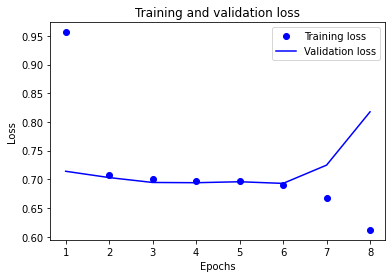

In [ ]:
history = model.fit(x_train_vectorized, y_train, epochs=8, batch_size=8, validation_split=0.25)
acc = history.history['accuracy']
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




i) Izvršiti evaluaciju modela nad testnim skupom. Kolika je tačnost nad ovim skupom?

In [ ]:
results = model.evaluate(x_test_vectorized, y_test)
